Test CAMB

In [181]:
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
#Find local CAMB installation:
_camb_path = os.path.join(os.path.abspath('..'),'CAMB/CAMB')
sys.path.insert(0, _camb_path)
import camb

print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 1.5.4 installed at /home/git/AstroCosmoComputational/Students/Gabriele_Russo/CAMB/CAMB/camb


In [182]:
# set up parameters:
# setting up my fiducial cosmology 
pars = camb.set_params(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06,  
                       As=2e-9, ns=0.965, halofit_version='mead', lmax=3000)

# I can change parameters, here changing K
pars1 = camb.set_params(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0.1, tau=0.06,  
                       As=2e-9, ns=0.965, halofit_version='mead', lmax=3000)

In [183]:
# prints all the parameters you can use with this function
pars

class: <CAMBparams>
 WantCls = True
 WantTransfer = False
 WantScalars = True
 WantTensors = False
 WantVectors = False
 WantDerivedParameters = True
 Want_cl_2D_array = True
 Want_CMB = True
 Want_CMB_lensing = True
 DoLensing = True
 NonLinear = NonLinear_none
 Transfer: <TransferParams>
   high_precision = False
   accurate_massive_neutrinos = False
   kmax = 0.9
   k_per_logint = 0
   PK_num_redshifts = 1
   PK_redshifts = [0.0]
 want_zstar = False
 want_zdrag = False
 min_l = 2
 max_l = 3150
 max_l_tensor = 600
 max_eta_k = 7875.0
 max_eta_k_tensor = 1200.0
 ombh2 = 0.022
 omch2 = 0.122
 omk = 0.0
 omnuh2 = 0.000644866570625114
 H0 = 67.5
 TCMB = 2.7255
 YHe = 0.24569492503497048
 num_nu_massless = 2.0293333333333337
 num_nu_massive = 1
 nu_mass_eigenstates = 1
 share_delta_neff = False
 nu_mass_degeneracies = [1.0146666666666666]
 nu_mass_fractions = [1.0]
 nu_mass_numbers = [1]
 InitPower: <InitialPowerLaw>
   tensor_parameterization = tensor_param_rpivot
   ns = 0.965
   nrun =

In [184]:
#calculate results for these parameters
results  = camb.get_results(pars)
results1 = camb.get_results(pars1)

**Background Cosmology:**

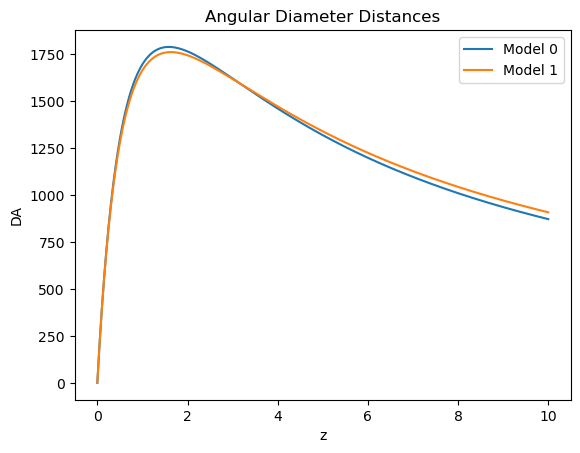

In [185]:
#Distances:
z = np.linspace(0, 10, 1000)
DA = results.angular_diameter_distance(z)
DA1 = results1.angular_diameter_distance(z)
plt.plot(z, DA, label='Model 0')
plt.plot(z, DA1, label='Model 1')
plt.legend()
plt.xlabel('z')
plt.ylabel('DA')
plt.title('Angular Diameter Distances')
plt.show()

In [186]:
# Background Densities:
a = np.logspace(-6, 0, 1000) # grid spaced in log since 
# from a=10^{-8} to 1 (deap rad domination to today)
#remaind a_{mat, rad equality} about 10^{-4}
densities  = results.get_background_densities(a) 
densities1 = results1.get_background_densities(a)

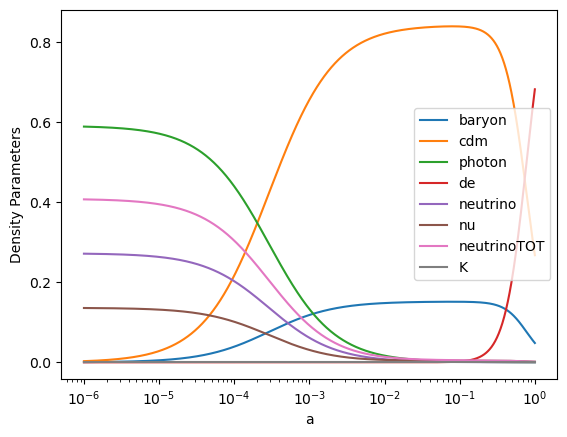

In [187]:
# Plotting relative densities
plt.plot(a, densities['baryon']/densities['tot'], label='baryon')
plt.plot(a, densities['cdm']/densities['tot'], label='cdm')
plt.plot(a, densities['photon']/densities['tot'], label='photon')
plt.plot(a, densities['de']/densities['tot'], label='de')
plt.plot(a, densities['neutrino']/densities['tot'], label='neutrino')
plt.plot(a, densities['nu']/densities['tot'], label='nu')
#plt.plot(a, densities['nu']/densities['tot'], label='nu') sommare neutrino con nu perchè sono varie famiglie di neutrini
plt.plot(a, (densities['neutrino']+densities['nu'])/densities['tot'], label='neutrinoTOT')
plt.plot(a, densities['K']/densities['tot'], label='K') # curvature
plt.legend()
plt.xlabel('a')
plt.ylabel('Density Parameters')
plt.xscale('log')

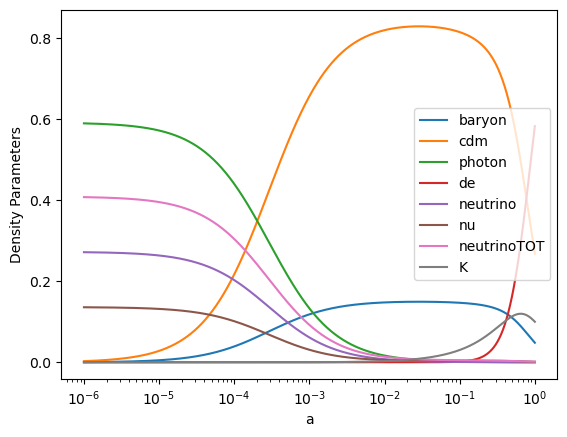

In [188]:
plt.plot(a, densities1['baryon']/densities1['tot'], label='baryon')
plt.plot(a, densities1['cdm']/densities1['tot'], label='cdm')
plt.plot(a, densities1['photon']/densities1['tot'], label='photon')
plt.plot(a, densities1['de']/densities1['tot'], label='de')
plt.plot(a, densities1['neutrino']/densities1['tot'], label='neutrino')
plt.plot(a, densities1['nu']/densities1['tot'], label='nu')
#plt.plot(a, densities1['nu']/densities['tot'], label='nu') sommare neutrino con nu perchè sono varie famiglie di neutrini
plt.plot(a, (densities1['neutrino']+densities1['nu'])/densities1['tot'], label='neutrinoTOT')
plt.plot(a, densities1['K']/densities1['tot'], label='K') #curvature
plt.legend()
plt.xlabel('a')
plt.ylabel('Density Parameters')
plt.xscale('log')

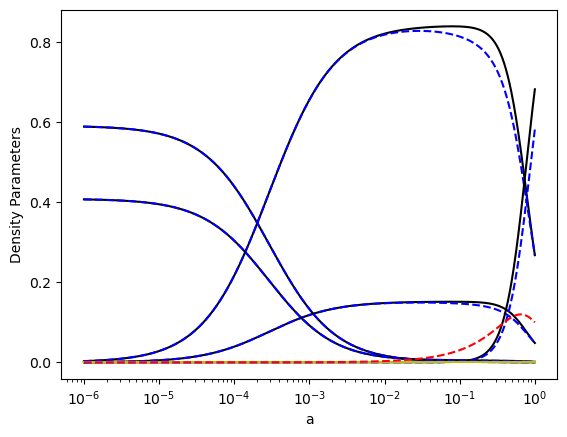

In [189]:
#2 graph comparison (using only total neutrino density)
# Plotting relative densities
plt.plot(a, densities['baryon']/densities['tot'], label='baryon', c='k')
plt.plot(a, densities1['baryon']/densities1['tot'], ls='--', label='baryon1', c='b')
plt.plot(a, densities['cdm']/densities['tot'], label='cdm', c='k')
plt.plot(a, densities1['cdm']/densities1['tot'], ls='--', label='cdm1', c='b')
plt.plot(a, densities['photon']/densities['tot'], label='photon', c='k')
plt.plot(a, densities1['photon']/densities1['tot'], ls='--', label='photons1', c='b')
plt.plot(a, densities['de']/densities['tot'], label='de', c='k')
plt.plot(a, densities1['de']/densities1['tot'], ls='--', label='de1', c='b')
plt.plot(a, (densities['neutrino']+densities['nu'])/densities['tot'], label='neutrinoTOT', c='k')
plt.plot(a, (densities1['neutrino']+densities1['nu'])/densities1['tot'], ls='--', label='neutrinoTOT1', c='b')
plt.plot(a, densities['K']/densities['tot'], label='K', c='y') # curvature
plt.plot(a, densities1['K']/densities1['tot'], ls='--', label='K1', c='r') 
#plt.legend()
plt.xlabel('a')
plt.ylabel('Density Parameters')
plt.xscale('log')

**Thermodynamics:**

In [190]:
# Computing free electrons fraction x_e
a = np.logspace(-6, 0, 1000) #grid spaced in log
z = 1./a - 1. #link between a and z
background = results.get_background_redshift_evolution(z)


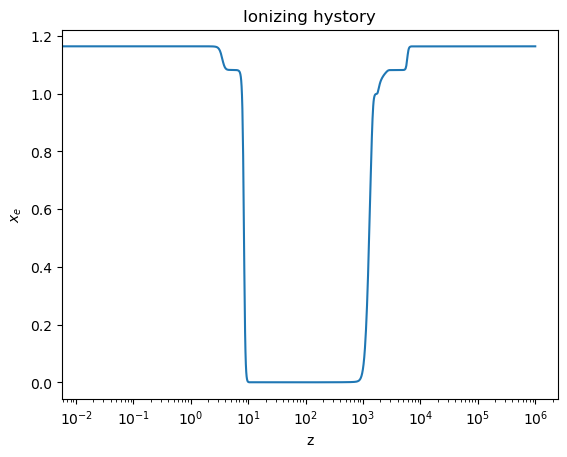

In [191]:
plt.plot(z, background['x_e'])
plt.xlabel('z')
plt.ylabel('$x_e$')
# riga verticale, unisci grafici
plt.title('Ionizing hystory')
plt.xscale('log')
#plt.yscale('log')


Tre free electron fraction starts over 1 since we defined it with H atoms, while this jump is given by the He fraction present.
The first bump and jump indicates the rehionization epoch (the explosions of first stars in the Universe free again the electrons, making again the Universe optically thick).
The second bumb indicates, approximately, the ricombination epoch, with the different transition given by the broken lines and jumps.

In [192]:
# I can change parameters, here changing tau
pars1 = camb.set_params(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.01,  
                       As=2e-9, ns=0.965, halofit_version='mead', lmax=3000)

#calculate results for these parameters
results  = camb.get_results(pars)
results1 = camb.get_results(pars1)

background1 = results1.get_background_redshift_evolution(z)



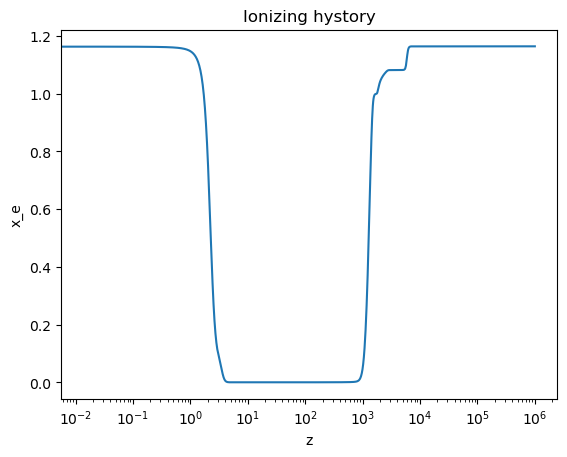

In [193]:
plt.plot(z, background1['x_e'])
plt.xlabel('z')
plt.ylabel('x_e')
plt.title('Ionizing hystory')
plt.xscale('log')
#plt.yscale('log')


In [194]:
# CAMB also compute the derived parameters, some of which could be useful
results.get_derived_params()
#z_star is recombination redshift

{'age': 13.740451258557629,
 'zstar': 1090.5875263840048,
 'rstar': 144.20807727355518,
 'thetastar': 1.0446246860260757,
 'DAstar': 13.804774021007146,
 'zdrag': 1059.2313618034489,
 'rdrag': 146.9871966667074,
 'kd': 0.14067153358370493,
 'thetad': 0.16177609526590137,
 'zeq': 3441.8515054149993,
 'keq': 0.010503792217322724,
 'thetaeq': 0.8079811517477885,
 'thetarseq': 0.4469751333084916}

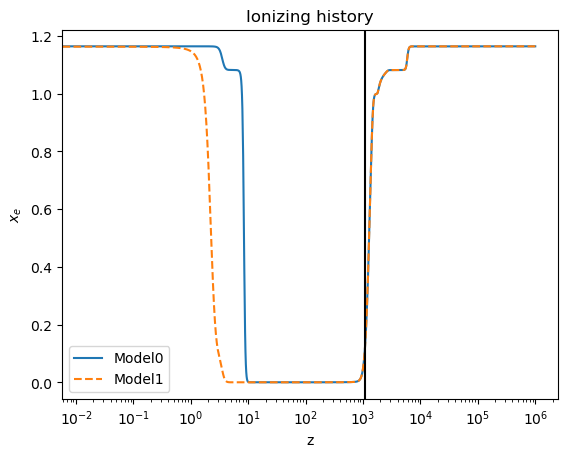

In [195]:
# Comparing graphs again
plt.plot(z, background['x_e'], label='Model0')
plt.plot(z, background1['x_e'], ls='--', label='Model1')
plt.axvline(results.get_derived_params()['zstar'], color='k') # vertical line for x_e 90% ionized
plt.legend()
plt.xlabel('z')
plt.ylabel('$x_e$')
plt.title('Ionizing history')
plt.xscale('log')

Diminushing tau, the optical thickness of the Universe diminushes and the Universe remains transparent to radiation further in the past, making rehionization happening in Model1 far more in the past then for Model0.

**Perturbations:**

Si devono risolvere E+BOLTZ accoppiate, a mano infinito!!

In [196]:
a = np.logspace(-6, 0, 1000) #grid spaced in log
z = 1./a - 1.
_vars = ['k/h', 'a', 'H', 'delta_cdm', 'delta_photon', 'delta_neutrino','Weyl']
_k=0.1 # first argument of _time_evolution
_time_evolution = results.get_redshift_evolution(_k, z, vars=_vars)#primo valore è k modo Fourier, Weyl è potenziale di weyl i.e. phi+psi

We want to understand what happens to perturbation SUB and SUPER horizon. We then need to understand when the mode enters the horizon.

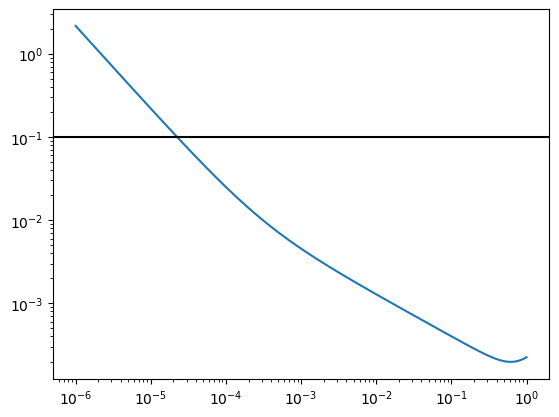

In [197]:
#find mode enters horizon
plt.plot(a, _time_evolution[:, _vars.index('H')])# H in conformal time
plt.axhline(_k, color='k')
plt.xscale('log')
plt.yscale('log')
#_time_evolution[:, _vars.index('a')]*_time_evolution[:, _vars.index('H')] -_k 
# with rootfinding gives the exact solution


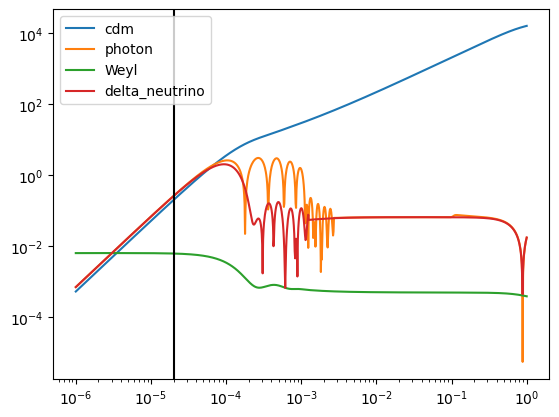

In [199]:
plt.plot(a, np.abs(_time_evolution[:, _vars.index('delta_cdm')]), label='cdm')
plt.plot(a, np.abs(_time_evolution[:, _vars.index('delta_photon')]), label='photon')
plt.plot(a, np.abs(_time_evolution[:, _vars.index('Weyl')]), label='Weyl')
plt.plot(a, np.abs(_time_evolution[:, _vars.index('delta_neutrino')]), label='delta_neutrino')
plt.axvline(2.e-5, color='k') #horizon entry ad occhio
plt.legend()
plt.xscale('log')
plt.yscale('log')

You can see the information treated in Cosmic Structure lessons:
- when the mode is super horizon, the grav. potential (Weyl) is constant, while it decays at horizon entry
- cdm and photon densities increase before horizon entry, then cdm continues growing, photon densities starts oscillating.
- neutrinos act as photons.

Note that cdm grothw super horizon evolves differently from what we have found since CAMB works in sincronups gauge, while we warked in newtonian gauge.